In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
boston_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
boston_df = pd.read_csv(boston_url)


Text(0.5, 1.0, 'Median Value of owner-occupied homes.')

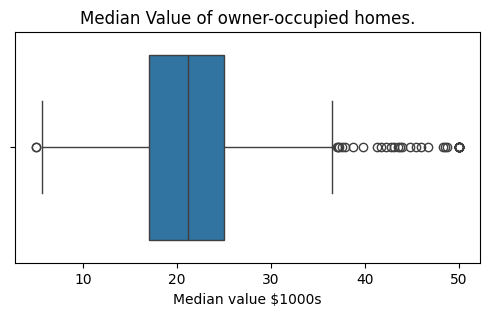

In [3]:
plt.figure(figsize=(6,3))
ax = sns.boxplot(x="MEDV", data=boston_df)
ax.set_xlabel("Median value $1000s")
ax.set_title("Median Value of owner-occupied homes.")


The Median Value of owner-occupied homes lies between 16000$ to 25000$. There are also a couple of outliers beyond the 35000$ range.

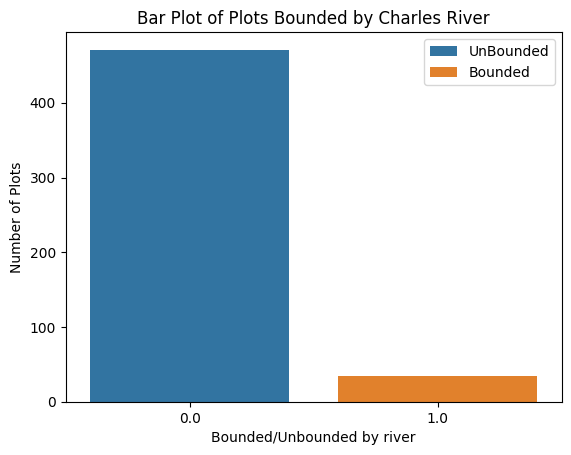

In [4]:
ax1 = sns.countplot(data=boston_df, x='CHAS',hue='CHAS')
plt.xlabel("Bounded/Unbounded by river")
plt.ylabel('Number of Plots')
plt.title("Bar Plot of Plots Bounded by Charles River")
plt.legend(['UnBounded','Bounded'])


We can see from the plot above that most of the plots are unbounded by the Charles River.

In [45]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 and Below"
boston_df.loc[
    (boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"
] = "Between 35 and 70"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 and Above"


Text(0.5, 1.0, 'Medain Value of Homes for each age group')

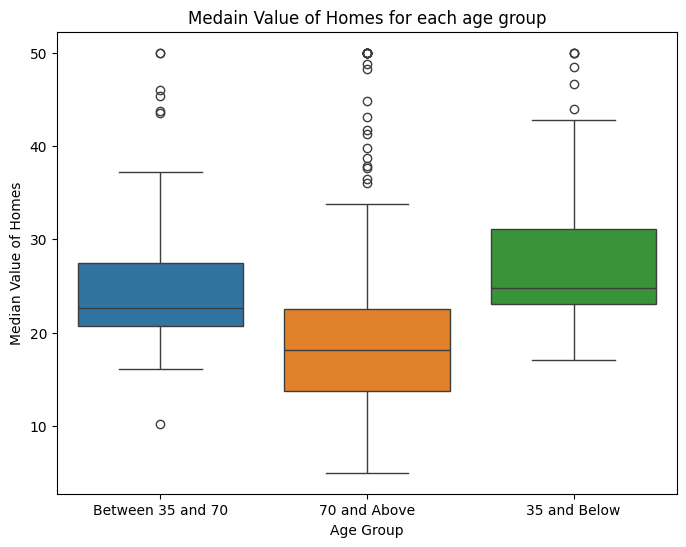

In [46]:
plt.figure(figsize=(8, 6))
ax2 = sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df, hue='AGE_GROUP')
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Median Value of Homes")
ax2.set_title("Medain Value of Homes for each age group")


From the above plot we can infer that the older homes(above 70 years old) have the least median house values as compared to their younger counterparts.

Text(0.5, 1.0, 'Scatterplot of Nitric Oxide Concentration vs The proportion of Industrial Area')

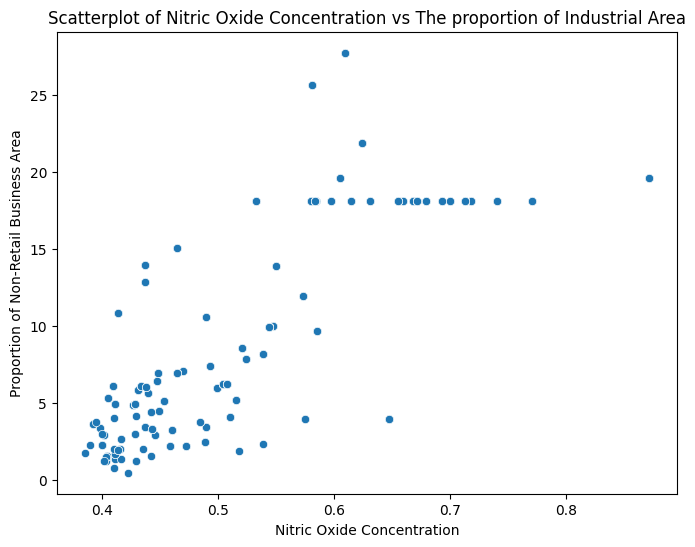

In [7]:
plt.figure(figsize=(8, 6))
ax3 = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax3.set_xlabel("Nitric Oxide Concentration")
ax3.set_ylabel("Proportion of Non-Retail Business Area")
ax3.set_title(
    "Scatterplot of Nitric Oxide Concentration vs The proportion of Industrial Area"
)


We can clearly see from the above graph that the increase in the Nitric Oxide Levels is directly proportional to the increase in the number of Non-Retail Business Area plots.

Text(0.5, 1.0, 'Histogram of Pupil to Teacher Ratio')

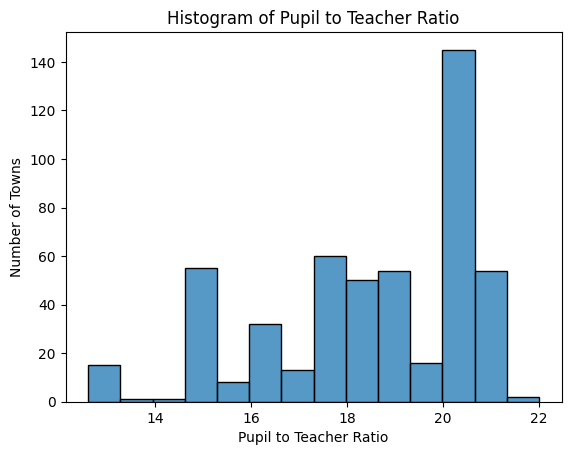

In [47]:
ax4 = sns.histplot(data=boston_df, x="PTRATIO")
ax4.set(xlabel="Pupil to Teacher Ratio", ylabel="Number of Towns")
ax4.set_title("Histogram of Pupil to Teacher Ratio")


We can clearly see that the most of the towns have a higher student to teacher ratio of 21 students per teacher.

### Question 1: - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


#### HYPOTHESIS

- H0 = There is no visible difference in Median Values of Houses bounded by the Charles River vs unbounded plots
- Ha = There is a visible difference in Median Values of Houses bounded by the Charles River vs unbounded plots

Using α = 0.05


In [9]:
# We run a Levene's Test to check for equality of variance

scipy.stats.levene(
    boston_df[boston_df["CHAS"] ==
              1]["MEDV"], boston_df[boston_df["CHAS"] == 0]["MEDV"], center='mean'
)

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [10]:
# Since the p-value from Levene's test is less than 0.05, we can assume inequality of variance, thus...

scipy.stats.ttest_ind(
    boston_df[boston_df["CHAS"] == 1]["MEDV"],
    boston_df[boston_df["CHAS"] == 0]["MEDV"],
    equal_var=False,
)


TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value of the test is less than the α of 0.05, we can safely reject the null hypothesis and say that the alternatice hypothesis is True.


### Questoin 2: - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


#### HYPOTHESIS

- H0 = There is no difference in the Median Value of Houses for each proportion of owner occupied units built prior to 1940.
- Ha = There is a difference in the Median Value of Houses for each proportion of owner occupied units built prior to 1940.

Using α = 0.05


In [11]:
# First we separate the groups
below_35 = boston_df[boston_df['AGE_GROUP'] == '35 and Below']['MEDV']
between_35_70 = boston_df[boston_df['AGE_GROUP']== 'Between 35 and 70']['MEDV']
above_70 = boston_df[boston_df['AGE_GROUP'] == '70 and Above']['MEDV']

In [12]:
# Now we calculate the ANOVA using the age groups that we have created earlier.
f_statistic, p_value = scipy.stats.f_oneway(below_35, between_35_70, above_70)
print('F statistic ', f_statistic)
print('p value ', p_value)

F statistic  36.40764999196599
p value  1.7105011022702984e-15


Since the observed p value is very less, we can safely reject the null hypothesis and accept the alternative hypothesis to be true.


### Question 3: - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


### HYPOTHESIS

- H0 = There is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.
- Ha = There is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

Using α = 0.05


In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

Since we see that the p value is significantly less than the alpha, we can safely assume that there is a relationship between higher nitric oxide levels and the proportion of non-retail business acres per town, thus rejecting the null hypothesis.


### Question 4: - What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


### HYPOTHESIS

- H0 = There is no impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
- Ha = There is an impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Using α = 0.05


In [14]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        18:13:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

- From the above test we can infer that since the p value is less than the alpha, we can reject the null hypothesis and assume the alternative hypothesis to be true.
- The Coefficient value for DIS is 1.0916. The impact of the addition of an additional weighted distance on the median value of houses will be less because the correlation coeeficient value is small(sqrt of 0.062 which is 0.249).
